In [18]:
import zipfile
import os
import glob

import shutil

#removes folder
shutil.rmtree('/notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/portal')



In [5]:
(type -p wget >/dev/null || (sudo apt update && sudo apt-get install wget -y)) \
&& sudo mkdir -p -m 755 /etc/apt/keyrings \
&& wget -qO- https://cli.github.com/packages/githubcli-archive-keyring.gpg | sudo tee /etc/apt/keyrings/githubcli-archive-keyring.gpg > /dev/null \
&& sudo chmod go+r /etc/apt/keyrings/githubcli-archive-keyring.gpg \
&& echo "deb [arch=$(dpkg --print-architecture) signed-by=/etc/apt/keyrings/githubcli-archive-keyring.gpg] https://cli.github.com/packages stable main" | sudo tee /etc/apt/sources.list.d/github-cli.list > /dev/null \
&& sudo apt update \
&& sudo apt install gh -y

SyntaxError: invalid syntax (2888654386.py, line 1)

In [2]:
!git add Historical_Structures_v15b_sub.ipynb

In [3]:
!git commit -m "sub version"
!git push

[main 576a700] sub version
 1 file changed, 49 insertions(+), 12 deletions(-)
Username for 'https://github.com': ^C


In [17]:
%pwd
#cd ./notebooks/Capstone/Data/Part1/
#unzip dataset_hist_structures2.zip -x "__MACOSX/*" "*/._*"

find . -name "__MACOSX" -exec rm -rf {} \;

'/notebooks/Capstone'

In [2]:
git commit

SyntaxError: invalid syntax (3734114867.py, line 1)

In [1]:
train_dir = '/notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset'
test_dir = '/notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478'

In [4]:
# importing necessary libraries

import os, os.path, sys, math
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
import itertools
from sklearn.utils import shuffle
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout, Reshape, InputLayer, Input, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

import cv2
from PIL import Image, ImageFile, UnidentifiedImageError
import os
import glob
from multiprocessing import Pool, get_context
import imghdr


# Configure multiprocessing to use the 'spawn' method
ctx = !get_context('spawn')

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.9.1


In [3]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

def validate_and_clean_images(directory, target_size=(224, 224)):
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    total_files = 0
    processed_files = 0
    removed_files = 0

    print(f"Scanning directory: {directory}")
    
    for root, dirs, files in os.walk(directory):
        print(f"Current directory: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Number of files: {len(files)}")
        
        total_files += len(files)
        for file in tqdm(files, desc=f"Processing {os.path.basename(root)}"):
            file_path = os.path.join(root, file)
            _, ext = os.path.splitext(file_path.lower())
            
            if ext not in valid_extensions:
                print(f"Removing invalid file: {file_path}")
                os.remove(file_path)
                removed_files += 1
                continue
            
            try:
                with Image.open(file_path) as img:
                    img = img.convert('RGB')
                    img = img.resize(target_size)
                    
                    if img.size[0] < 10 or img.size[1] < 10 or np.array(img).std() < 1:
                        print(f"Removing small or empty image: {file_path}")
                        os.remove(file_path)
                        removed_files += 1
                        continue
                    
                    img.save(file_path)
                    processed_files += 1
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                os.remove(file_path)
                removed_files += 1

    print(f"Total files scanned: {total_files}")
    print(f"Files processed successfully: {processed_files}")
    print(f"Files removed: {removed_files}")

# Use the function
print("Processing training directory:")
validate_and_clean_images(train_dir)

print("\nProcessing testing directory:")
validate_and_clean_images(test_dir)

Processing training directory:
Scanning directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset
Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset
Subdirectories: ['gargoyle', 'altar', 'bell_tower', 'stained_glass', 'dome(outer)', 'dome(inner)', 'vault', 'flying_buttress', 'apse', 'column']
Number of files: 0


Processing Stuctures_Dataset: 0it [00:00, ?it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/gargoyle
Subdirectories: []
Number of files: 1571


Processing gargoyle: 100%|██████████| 1571/1571 [00:10<00:00, 143.83it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/altar
Subdirectories: []
Number of files: 829


Processing altar: 100%|██████████| 829/829 [00:04<00:00, 167.47it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/bell_tower
Subdirectories: []
Number of files: 1059


Processing bell_tower: 100%|██████████| 1059/1059 [00:06<00:00, 173.64it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/stained_glass
Subdirectories: []
Number of files: 1033


Processing stained_glass: 100%|██████████| 1033/1033 [00:06<00:00, 168.22it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/dome(outer)
Subdirectories: []
Number of files: 1177


Processing dome(outer): 100%|██████████| 1177/1177 [00:06<00:00, 174.99it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/dome(inner)
Subdirectories: []
Number of files: 616


Processing dome(inner): 100%|██████████| 616/616 [00:03<00:00, 169.03it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/vault
Subdirectories: []
Number of files: 1110


Processing vault: 100%|██████████| 1110/1110 [00:06<00:00, 166.03it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/flying_buttress
Subdirectories: []
Number of files: 407


Processing flying_buttress: 100%|██████████| 407/407 [00:02<00:00, 157.49it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/apse
Subdirectories: []
Number of files: 514


Processing apse: 100%|██████████| 514/514 [00:02<00:00, 175.74it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Stuctures_Dataset/column
Subdirectories: []
Number of files: 1919


Processing column: 100%|██████████| 1919/1919 [00:11<00:00, 167.12it/s]


Total files scanned: 10235
Files processed successfully: 10235
Files removed: 0

Processing testing directory:
Scanning directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478
Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478
Subdirectories: ['gargoyle', 'altar', 'bell_tower', 'stained_glass', 'dome(outer)', 'dome(inner)', 'vault', 'flying_buttress', 'apse', 'column']
Number of files: 0


Processing Dataset_test_original_1478: 0it [00:00, ?it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/gargoyle
Subdirectories: []
Number of files: 238


Processing gargoyle: 100%|██████████| 238/238 [00:01<00:00, 169.47it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/altar
Subdirectories: []
Number of files: 140


Processing altar: 100%|██████████| 140/140 [00:00<00:00, 172.69it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/bell_tower
Subdirectories: []
Number of files: 170


Processing bell_tower: 100%|██████████| 170/170 [00:01<00:00, 163.35it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/stained_glass
Subdirectories: []
Number of files: 163


Processing stained_glass: 100%|██████████| 163/163 [00:01<00:00, 139.93it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/dome(outer)
Subdirectories: []
Number of files: 168


Processing dome(outer): 100%|██████████| 168/168 [00:00<00:00, 174.42it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/dome(inner)
Subdirectories: []
Number of files: 86


Processing dome(inner): 100%|██████████| 86/86 [00:00<00:00, 168.22it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/vault
Subdirectories: []
Number of files: 164


Processing vault: 100%|██████████| 164/164 [00:00<00:00, 172.31it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/flying_buttress
Subdirectories: []
Number of files: 78


Processing flying_buttress: 100%|██████████| 78/78 [00:00<00:00, 171.86it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/apse
Subdirectories: []
Number of files: 57


Processing apse: 100%|██████████| 57/57 [00:00<00:00, 182.76it/s]


Current directory: /notebooks/Capstone/Data/Part1/dataset_hist_structures/Dataset_test/Dataset_test_original_1478/column
Subdirectories: []
Number of files: 210


Processing column: 100%|██████████| 210/210 [00:01<00:00, 163.58it/s]

Total files scanned: 1474
Files processed successfully: 1474
Files removed: 0


Found 10235 images belonging to 10 classes.


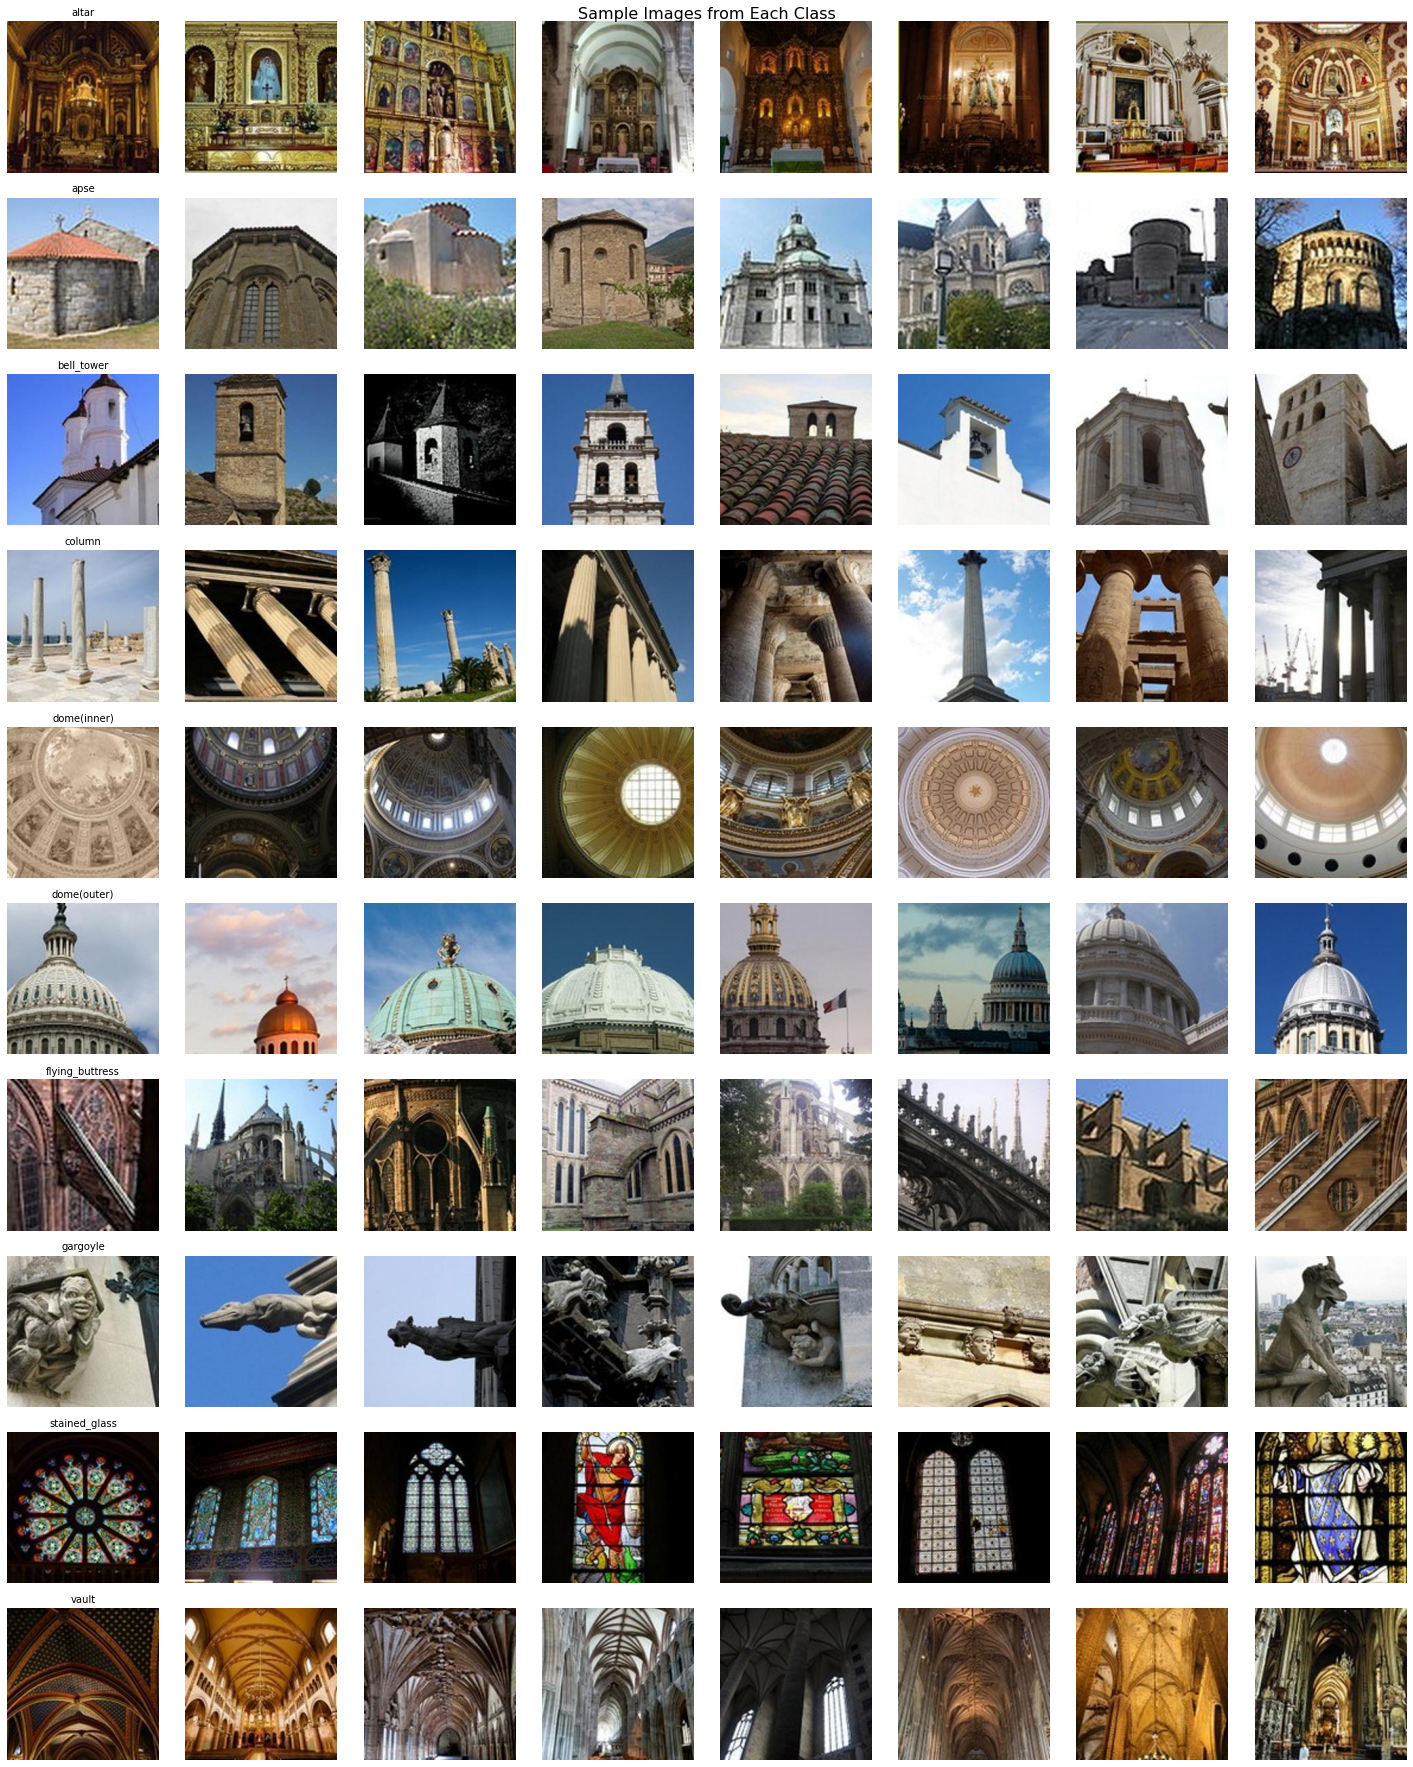

In [6]:
# Assuming you have already set up your ImageDataGenerator
# If not, you can set it up like this:
# datagen = ImageDataGenerator(rescale=1./255)

# Set up the generator
datagen = ImageDataGenerator(rescale=1./255)

# Set up the generator to flow from directory
generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust to your image size
    batch_size=1,
    class_mode='categorical',
    shuffle=True
)

# Get class names
class_names = list(generator.class_indices.keys())

# Create a figure to display images
fig, axes = plt.subplots(10, 8, figsize=(20, 25))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for class_idx, class_name in enumerate(class_names):
    # Get 8 images for this class
    class_images = []
    while len(class_images) < 8:
        x, y = generator.next()
        if np.argmax(y) == class_idx:
            class_images.append(x[0])
    
    # Display the images
    for i, img in enumerate(class_images):
        ax = axes[class_idx, i]
        ax.imshow(img)
        ax.axis('off')
        if i == 0:
            ax.set_title(class_name, fontsize=10)

plt.tight_layout()
plt.show()

In [3]:
# counting files to check for class imbalance
def count_files_in_directory(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            file_count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = file_count
    return class_counts

train_counts = count_files_in_directory(train_dir)
val_counts = count_files_in_directory(test_dir)

print("Training set file counts:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count}")

print("\nValidation set file counts:")
for class_name, count in val_counts.items():
    print(f"{class_name}: {count}")
    
# the file couts show evidence of class imbalance

Training set file counts:
gargoyle: 1571
altar: 829
bell_tower: 1059
stained_glass: 1033
dome(outer): 1177
dome(inner): 616
vault: 1110
flying_buttress: 407
apse: 514
column: 1919

Validation set file counts:
gargoyle: 238
altar: 140
bell_tower: 170
stained_glass: 163
dome(outer): 168
dome(inner): 86
vault: 164
flying_buttress: 78
apse: 57
column: 210


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

# old


In [5]:

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Define image dimensions and batch size
img_height, img_width = 160, 160  # Reduced image size
batch_size = 16  # Reduced batch size

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.6,1.4],
    channel_shift_range=50.0,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

"""
# Print number of samples
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)

def print_class_distribution(generator):
    classes = np.zeros(generator.num_classes)
    for i in range(len(generator)):
        _, y = generator[i]
        classes += y.sum(axis=0)
    for i, count in enumerate(classes):
        print(f"Class {i}: {count}")

print("Training set class distribution:")
print_class_distribution(train_generator)
print("\nValidation set class distribution:")
print_class_distribution(validation_generator)
"""

train_classes = train_generator.classes

class_weights = compute_class_weight('balanced', classes=np.unique(train_classes), y=train_classes)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)

unique, counts = np.unique(train_classes, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution:", class_distribution)


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Quadro P5000, compute capability 6.1
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
Found 10235 images belonging to 10 classes.
Found 1474 images belonging to 10 classes.
Class weights: {0: 1.2346200241254524, 1: 1.9912451361867705, 2: 0.9664778092540132, 3: 0.5333507034914018, 4: 1.661525974025974, 5: 0.8695836873406967, 6: 2.5147420147420148, 7: 0.6514958625079568, 8: 0.9908034849951597, 9: 0.9220720720720721}
Class distribution: {0: 829, 1: 514, 2: 1059, 3: 1919, 4: 616, 5: 1177, 6: 407, 7: 1571, 8: 1033, 9: 1110}


In [6]:
# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

class LearningRateSchedulerCallback(Callback):
    def __init__(self, schedule):
        super(LearningRateSchedulerCallback, self).__init__()
        self.schedule = schedule
    
    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call the schedule function to get the scheduled learning rate
        scheduled_lr = self.schedule(epoch)
        # Set the learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print(f'\nEpoch {epoch+1}: Learning rate is {scheduled_lr:.6f}.')
        

class PerClassAccuracy(Callback):
    def __init__(self, validation_data, class_names):
        super(PerClassAccuracy, self).__init__()
        self.validation_data = validation_data
        self.class_names = class_names

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.validation_data)
        y_pred = predictions.argmax(axis=1)
        y_true = self.validation_data.classes
        
        # Calculate per-class accuracy
        per_class_accuracy = {}
        for i, class_name in enumerate(self.class_names):
            true_positives = np.sum((y_true == i) & (y_pred == i))
            total = np.sum(y_true == i)
            accuracy = true_positives / total if total > 0 else 0
            per_class_accuracy[class_name] = accuracy

        print("\nPer-class Accuracy:")
        for class_name, accuracy in per_class_accuracy.items():
            print(f"{class_name}: {accuracy:.4f}")

        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names, zero_division=0))

def lr_schedule(epoch):
    initial_lr = 1e-4
    if epoch < 10:
        return initial_lr
    elif epoch < 20:
        return initial_lr * 0.1
    else:
        return initial_lr * 0.01
    
lr_scheduler = LearningRateScheduler(lr_schedule)


# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
lr_scheduler = LearningRateSchedulerCallback(lr_schedule) 

# Instantiate your PerClassAccuracy callback
per_class_accuracy = PerClassAccuracy(validation_generator, list(train_generator.class_indices.keys()))

# define classification report
class ClassificationReportCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.validation_data)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = self.validation_data.classes
        print(classification_report(y_true, y_pred_classes))

        
# instantiate classification eport
classification_report_callback = ClassificationReportCallback(validation_generator)

# custom call back to monitor class predictions
class PredictionMonitorCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.validation_data)
        class_predictions = np.argmax(predictions, axis=1)
        unique, counts = np.unique(class_predictions, return_counts=True)
        print("\nClass prediction distribution:")
        for u, c in zip(unique, counts):
            print(f"Class {u}: {c}")
        if len(unique) == 1:
            print("Warning: Model is predicting only one class!")

prediction_monitor = PredictionMonitorCallback(validation_generator)

# First, create a list of all your callbacks
callbacks = [
    early_stopping,
    checkpoint,
    reduce_lr,
    per_class_accuracy,
    classification_report_callback,
]

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all but the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

"""
# model adjusted to better handle class imbalance
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
"""

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.6),  # Increased dropout
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.6),  # Increased dropout
    Dense(train_generator.num_classes, activation='softmax')
])


# Create the base optimizer with clipnorm
base_optimizer = Adam(learning_rate=lr_schedule(0), clipnorm=1.0)

# Wrap it in the mixed precision loss scale optimizer
optimizer = tf.keras.mixed_precision.LossScaleOptimizer(base_optimizer)

model.compile(optimizer=optimizer,
              loss=focal_loss(),
              metrics=['accuracy'])



58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/50
639/639 [==============================] - ETA: 0s - loss: 1.4808 - accuracy: 0.4744
Epoch 1: val_accuracy improved from -inf to 0.61481, saving model to best_model.h5
93/93 [==============================] - 4s 35ms/step

Per-class Accuracy:
altar: 0.2143
apse: 0.0351
bell_tower: 0.1235
column: 0.0286
dome(inner): 0.0000
dome(outer): 0.1190
flying_buttress: 0.0641
gargoyle: 0.1303
stained_glass: 0.1350
vault: 0.0976

Classification Report:
                 precision    recall  f1-score   support

          altar       0.08      0.21      0.12       140
           apse       0.09      0.04      0.05        57
     bell_tower       0.13      0.12      0.13       170
         column       0.19      0.03      0.05       210
    dome(inner)       0.00      0.00      0.00        86
    dome(outer)       0.11      0.12      0.12       168
flying_buttress       0.06      0.06      0.06        78
       gargoyle       0.14      0.13      0.14       238
  stained_glass       0.11    

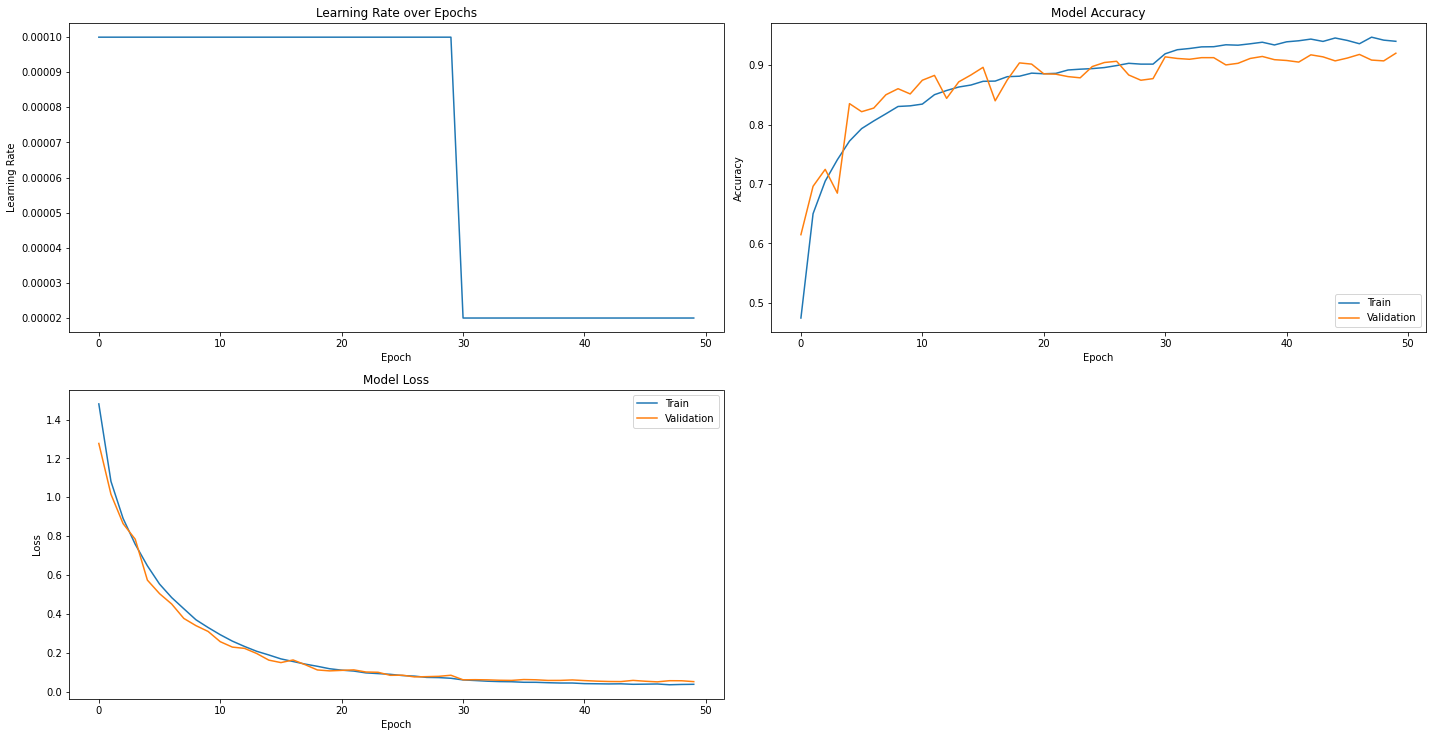

Final Training Accuracy: 0.9406008124351501
Final Validation Accuracy: 0.920516312122345
Best Validation Accuracy: 0.920516312122345 (Epoch 50)


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    class_weight=class_weight_dict
)


# Plotting training history
plt.figure(figsize=(20, 15))

# Plot the learning rate over epochs
plt.subplot(3, 2, 1)
plt.plot(history.history['lr'])
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

# Plot training & validation accuracy values
plt.subplot(3, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(3, 2, 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# If you have per-class accuracy in your history
if 'class_0_accuracy' in history.history:
    num_classes = len([key for key in history.history.keys() if key.startswith('class_') and key.endswith('_accuracy')])
    plt.subplot(3, 2, 4)
    for i in range(num_classes):
        plt.plot(history.history[f'class_{i}_accuracy'], label=f'Class {i}')
    plt.title('Per-Class Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Confusion Matrix (if you have implemented it)
if 'confusion_matrix' in locals() or 'confusion_matrix' in globals():
    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Print final accuracies
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

# Print best validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
print(f"Best Validation Accuracy: {history.history['val_accuracy'][best_epoch]} (Epoch {best_epoch + 1})")

In [5]:
# verify working directory
%pwd 

'/notebooks/Capstone'